第七章 图像平滑处理
通过图像平滑处理，可以有效地过滤掉图像内的噪声信息。
本章主要介绍：
均值滤波
方框滤波
高斯滤波
中值滤波
双边滤波
2D卷积（自定义滤波）

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
%matplotlib inline

def show(img):
    #picture_name_full = picture_name + ".jpg"
    #img = cv2.imread(picture_name_full)
    img = img[:,:,(2,1,0)]                # opencv中的通道顺序是BGR，与Python的RGB刚好相反。因此此处需要调整顺序。
    img2 = img[:,:,::-1]                  # 必须为 ::-1
    plt.imshow(img)

(<matplotlib.axes._subplots.AxesSubplot at 0x26969b38ef0>, None)

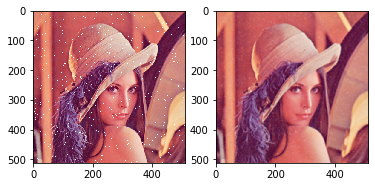

In [3]:
#均值滤波
#dst = cv2.blur(src,ksize,anchor,borderType)
#ksize : 滤波核的大小。例如(5,5)
#anchor : 锚点位置，默认（-1,-1）
#borderType 是边界样式
#原理是 取邻域的和的均值
o = cv2.imread("image\\lenaNoise.png")
r = cv2.blur(o,(5,5))
plt.subplot(121),show(o)
plt.subplot(122),show(r)

(<matplotlib.axes._subplots.AxesSubplot at 0x26969c4e978>, None)

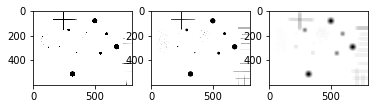

In [4]:
o = cv2.imread("image\\noise.bmp")
r5 = cv2.blur(o,(5,5))
r30 = cv2.blur(o,(30,30))
plt.subplot(131),show(o)
plt.subplot(132),show(r5)
plt.subplot(133),show(r30)

(<matplotlib.axes._subplots.AxesSubplot at 0x1cc4ce8fe80>, None)

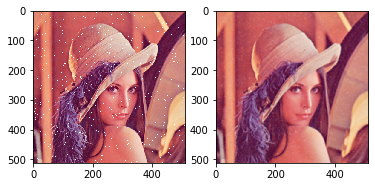

In [5]:
#方框滤波
#方框滤波可以自由选择是否归一化，即不一定取均值
#dst = cv2.boxFilter(src,ddepth,ksize,anchor,normalize,borderType)
#ddepth 处理结果图像的图像深度，一般使用-1表示与原始图像使用相同的图像深度
#ksize 是滤波核的大小
#anchor是锚点
#normalize表示滤波是否进行归一化，1表示需要，0表示不需要
o = cv2.imread("image\\lenaNoise.png")
r = cv2.boxFilter(o,-1,(5,5))
plt.subplot(121),show(o)
plt.subplot(122),show(r)

(<matplotlib.axes._subplots.AxesSubplot at 0x1cc4cd29ac8>, None)

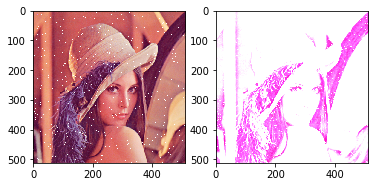

In [4]:
#当设置normalize = 0时，方框滤波的效果会明显增强，因为直方图是累积的
#normalize = 0时，可以适当减小kernel的大小，均衡滤波的效果
o = cv2.imread("image\\lenaNoise.png")
r = cv2.boxFilter(o,-1,(2,2),normalize = 0)
plt.subplot(121),show(o)
plt.subplot(122),show(r)

高斯滤波
在进行均值滤波和方框滤波时，其邻域内的每个像素的权重是相等的。在高斯滤波中，会将中心的权重值加大，远离中心点的权重值减小。
高斯滤波使用的kernel的宽度和高度必须都是奇数。
使用函数 cv2.GaussianBlur() 具体语法如下
dst = cv2.GaussianBlur(src,ksize,sigmaX,sigmaY,borderType)
sigmaX : 卷积核在水平方向上（X轴方向）的标准差，控制权重的比例
若sigmaY = 0;则只采用sigmaX的参数
若两者都为0，则通过ksize.width和ksize.height计算
sigmaX = 0.3*[(ksize.width-1)*0.5-1]+0.8
sigmaX = 0.3*[(ksize.height-1)*0.5-1]+0.8

(<matplotlib.axes._subplots.AxesSubplot at 0x1cc4df02940>, None)

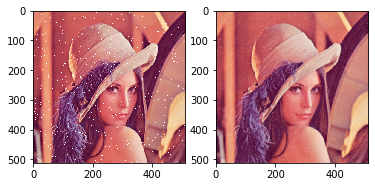

In [6]:
o = cv2.imread("image\\lenaNoise.png")
r = cv2.GaussianBlur(o,(5,5),0,0)
plt.subplot(121),show(o)
plt.subplot(122),show(r)

中值滤波
顾名思义，不再使用邻域的平均值，而是使用邻域的中间值（中位数）
使用 cv2.medianBlur(src,ksize) 函数
语法较为简单，不在赘叙,但需要注意ksize是一个奇数

(<matplotlib.axes._subplots.AxesSubplot at 0x1cc4e0c8400>, None)

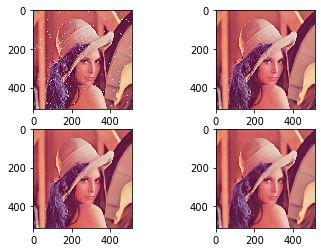

In [9]:
o = cv2.imread("image\\lenaNoise.png")
r1 = cv2.medianBlur(o,3)
r2 = cv2.medianBlur(o,5)
r3 = cv2.medianBlur(o,7)
plt.subplot(221),show(o)
plt.subplot(222),show(r1)
plt.subplot(223),show(r2)
plt.subplot(224),show(r3)

双边滤波是综合考虑空间信息和色彩信息的滤波方式，在滤波过程中能够有效地保护图像内的边缘信息。
例如高斯滤波，会使得图像内部的边缘变得模糊
双边滤波不仅考虑距离信息（距离越大，权重越小），也考虑色彩信息（色差越大，权重越小）
使用 cv2.bilateralFilter() 函数
dst = cv2.bilateralFilter(src,d,sigmaColor,sigmaSpace,borderType)
d : 滤波时选取的空间距离参数，这里表示以当前像素点为中心点的直径，注意是直径
   推荐选择d = 5,对于较大噪声的离线滤波，可以选择d =9
sigmaColor : 色差的阈值，色差小于sigmaColor的像素值会参与滤波
sigmaSpace : 当d > 0时，该值无意义，不然则该值决定d（与d成正比例）

(<matplotlib.axes._subplots.AxesSubplot at 0x1cc4e1b99b0>, None)

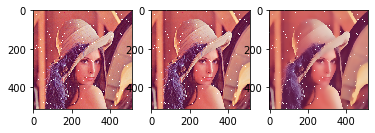

In [10]:
#当图像内部本身就不是边界分明时，双边滤波的效果并不好
o = cv2.imread("image\\lenaNoise.png")
r1 = cv2.bilateralFilter(o,5,10,10)
r2 = cv2.bilateralFilter(o,25,100,100)
plt.subplot(131),show(o)
plt.subplot(132),show(r1)
plt.subplot(133),show(r2)

2D卷积
dst = cv2.filter2D(src,ddepth,kernel,anchor,delta,borderType)   可以自定义卷积核
通常情况 ： dst = cv2.filter2D(src,ddepth,kernel)
对于该函数 暂不举例。